In [247]:
%matplotlib inline

In [248]:
# Data
import pandas as pd
import numpy as np

In [249]:
# Visualization
import seaborn as sns
sns.set_style('darkgrid')

In [250]:
import platform
if platform.system() == 'Windows':
    import os
    os.chdir('C:/Users/Lordzsolt/_PythonStuff/Kaggle/Titanic')

In [251]:
trainDF = pd.read_csv("input/train.csv")
testDF = pd.read_csv("input/test.csv")
combineDF = pd.concat([trainDF, testDF], axis=0).reset_index(drop=True)

In [252]:
combineDF = combineDF.fillna(np.nan)
nulls = combineDF.isnull().sum().sort_values(ascending=False)
nulls = nulls[nulls > 0]

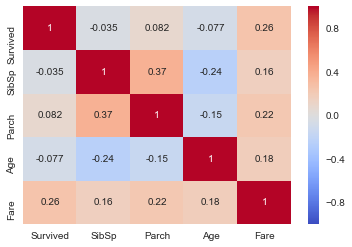

In [253]:
sns.heatmap(combineDF[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, cmap='coolwarm')

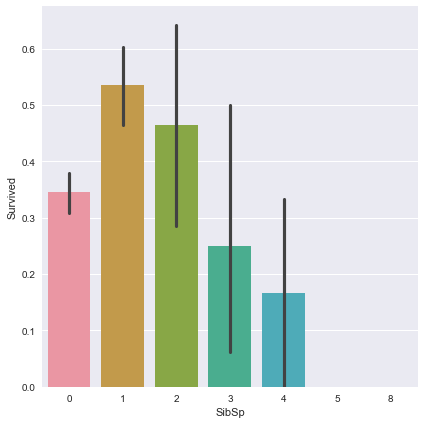

In [254]:
sns.factorplot(x='SibSp', y='Survived', data=combineDF, kind='bar', size=6)

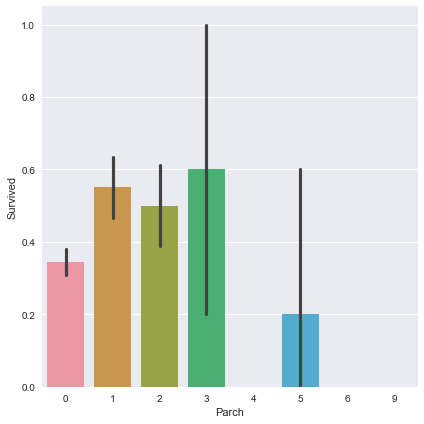

In [255]:
sns.factorplot(x='Parch', y='Survived', data=combineDF, kind='bar', size=6)

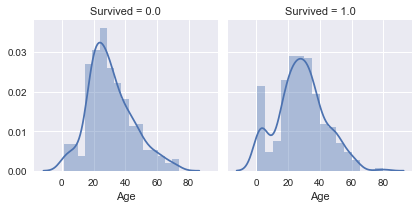

In [256]:
g = sns.FacetGrid(combineDF, col='Survived')
g = g.map(sns.distplot, "Age")

In [257]:
combineDF['Fare'] = combineDF['Fare'].fillna(combineDF['Fare'].median())

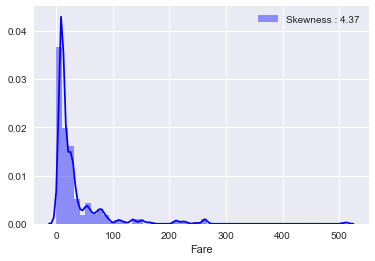

In [258]:
fares = combineDF['Fare']
g = sns.distplot(fares, color='b', label="Skewness : %.2f"%(fares.skew()))
g = g.legend(loc='best')

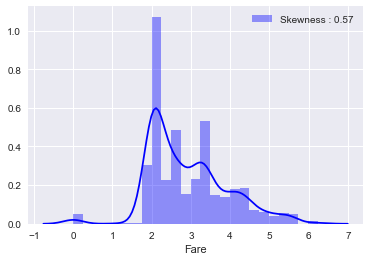

In [259]:
combineDF['Fare'] = fares.map(lambda x: np.log(x) if x > 0 else 0)

fares = combineDF['Fare']
g = sns.distplot(fares, color='b', label="Skewness : %.2f"%(fares.skew()))
g = g.legend(loc='best')

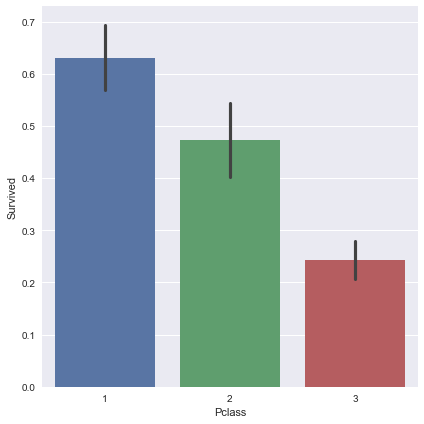

In [260]:
sns.factorplot(x='Pclass', y='Survived', data=combineDF, kind="bar", size=6)

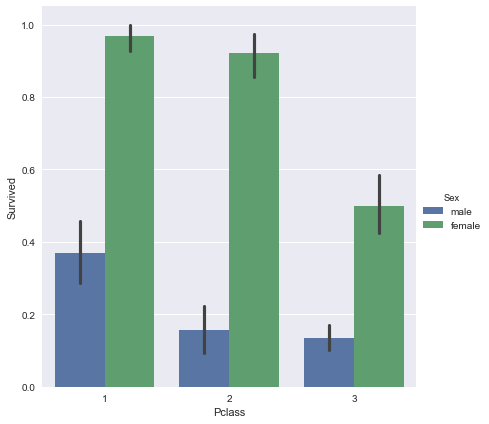

In [261]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=combineDF, kind="bar", size=6)

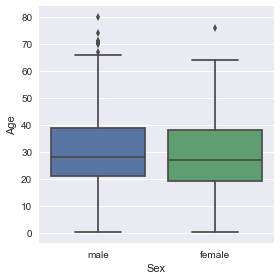

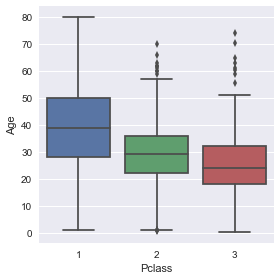

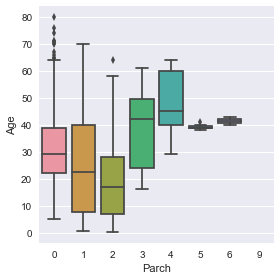

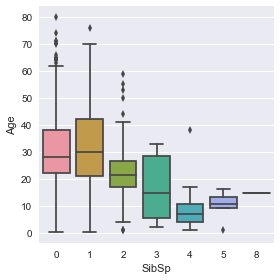

In [262]:
g = sns.factorplot(y='Age', x='Sex', data=combineDF, kind="box")
g = sns.factorplot(y='Age', x='Pclass', data=combineDF, kind="box")
g = sns.factorplot(y='Age', x='Parch', data=combineDF, kind="box")
g = sns.factorplot(y='Age', x='SibSp', data=combineDF, kind="box")

In [263]:
combineDF['Sex'] = combineDF['Sex'].map({'male': 0, 'female': 1})
combineDF.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599
2,26.0,NaN,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803
4,35.0,NaN,S,2.085672,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450
5,NaN,NaN,Q,2.135148,"Moran, Mr. James",0,6,3,0,0,0.0,330877
6,54.0,E46,S,3.948596,"McCarthy, Mr. Timothy J",0,7,1,0,0,0.0,17463
7,2.0,NaN,S,3.048088,"Palsson, Master. Gosta Leonard",1,8,3,0,3,0.0,349909
8,27.0,NaN,S,2.409941,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,1,0,1.0,347742
9,14.0,NaN,C,3.403555,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,1.0,237736


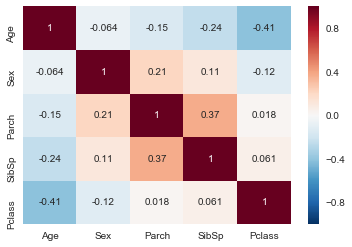

In [264]:
sns.heatmap(combineDF[['Age', 'Sex', 'Parch', 'SibSp', 'Pclass']].corr(), annot=True)

In [265]:
# Pclass, SibSp, Parch
pclasses = set(combineDF['Pclass'])
sibsps = set(combineDF['SibSp'])
parchs = set(combineDF['Parch'])

median = combineDF['Age'].median()

groupMedian = {}

for pclass in pclasses:
    groupMedian[pclass] = {}
    for sibsp in sibsps:
        groupMedian[pclass][sibsp] = {}
        for parch in parchs:
            currentMedian = combineDF['Age'][((combineDF['Pclass'] == pclass) & (combineDF['SibSp'] == sibsp) & (combineDF['Parch'] == parch))].median()
            if not np.isnan(currentMedian):
                groupMedian[pclass][sibsp][parch] = currentMedian
            else:
                groupMedian[pclass][sibsp][parch] = median
            
missingAges = list(combineDF['Age'][combineDF['Age'].isnull()].index)
for index in missingAges:
    combineDF.loc[index, 'Age'] = groupMedian[combineDF['Pclass'][index]][combineDF['SibSp'][index]][combineDF['Parch'][index]]

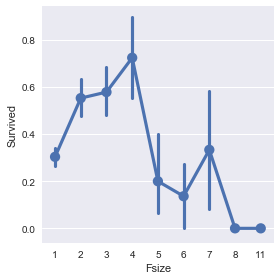

In [266]:
combineDF['Fsize'] = combineDF['SibSp'] + combineDF['Parch'] + 1
sns.factorplot(x='Fsize', y='Survived', data=combineDF)

In [267]:
combineDF = pd.get_dummies(combineDF, columns=['Pclass'], prefix='Pc', drop_first=True)
print(combineDF.head(10))

    Age Cabin Embarked      Fare  \
0  22.0   NaN        S  1.981001   
1  38.0   C85        C  4.266662   
2  26.0   NaN        S  2.070022   
3  35.0  C123        S  3.972177   
4  35.0   NaN        S  2.085672   
5  25.0   NaN        Q  2.135148   
6  54.0   E46        S  3.948596   
7   2.0   NaN        S  3.048088   
8  27.0   NaN        S  2.409941   
9  14.0   NaN        C  3.403555   

                                                Name  Parch  PassengerId  Sex  \
0                            Braund, Mr. Owen Harris      0            1    0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2    1   
2                             Heikkinen, Miss. Laina      0            3    1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4    1   
4                           Allen, Mr. William Henry      0            5    0   
5                                   Moran, Mr. James      0            6    0   
6                            McCarth